## Principais Municípios Demasmatados entre 2008 e 2018 - Amazônia Legal

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [15]:
# Municipios com maiores áreas de desmatamento

df = pd.read_csv('terrabrasilis_amazon_9_8_2019_1568042920617.csv', encoding='latin', delimiter=',')

In [16]:
df.head()

,time,area,mun
0,2018,0.230179,SANTA BÃRBARA DO PARÃ
1,2018,11.406981,CAPIXABA
2,2018,5.401569,JURUTI
3,2018,0.536140,NOVA TIMBOTEUA
4,2018,24.871762,RONDON DO PARÃ


In [17]:
df.tail()

,time,area,mun
4960,2008,0.762716,PEQUIZEIRO
4961,2008,0.246361,ARAPUTANGA
4962,2008,8.523483,BORBA
4963,2008,2.839835,FERREIRA GOMES
4964,2008,76.341075,VILA RICA


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 3 columns):
time    4965 non-null int64
area    4965 non-null float64
mun     4965 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 116.4+ KB


In [19]:
list(df.columns)

['time', 'area', 'mun']

In [20]:
df.rename(columns={'time': 'Ano','area': 'Area', 'mun': 'Municipio'}, inplace=True)

In [21]:
df.head()

,Ano,Area,Municipio
0,2018,0.230179,SANTA BÃRBARA DO PARÃ
1,2018,11.406981,CAPIXABA
2,2018,5.401569,JURUTI
3,2018,0.536140,NOVA TIMBOTEUA
4,2018,24.871762,RONDON DO PARÃ


## Desmatamento - Ano x Area

In [22]:
AnosGroups = df.groupby("Ano")["Area"].sum().reset_index()

In [23]:
AnosGroups.sort_values(by= "Ano", ascending=False)

,Ano,Area
10,2018,7032.589550
9,2017,6670.476889
8,2016,7004.365140
7,2015,5813.024490
6,2014,4834.803785
5,2013,5088.228148
4,2012,4088.795354
3,2011,5326.988476
2,2010,5819.288562
1,2009,5845.057714


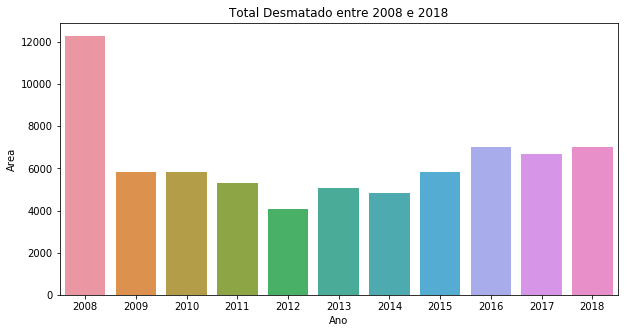

In [24]:
plt.figure(figsize=(10,5))
plt.title("Total Desmatado entre 2008 e 2018")
sns.barplot(x="Ano", y="Area", data=AnosGroups);

## Municipos mais desmatados por KM2

In [25]:
MunicipiosGroups = df.groupby("Municipio")["Area"].sum().reset_index()

In [26]:
MunicipiosGroups.sort_values(by= "Area", ascending=False).head(10)

,Municipio,Area
10,ALTAMIRA,3365.799515
438,SÃO FÃLIX DO XINGU,3261.067060
361,PORTO VELHO,2801.910405
315,NOVO REPARTIMENTO,2108.676842
244,LÃBREA,1698.109124
139,COLNIZA,1629.726858
322,PACAJÃ,1588.124837
314,NOVO PROGRESSO,1573.218293
212,ITAITUBA,1277.943209
296,NOVA MAMORÃ,1187.542814


In [27]:
df.Municipio.replace({'SÃO FÃLIX DO XINGU':'SÃO FÉLIX DO XINGU',
                     'LÃBREA':'LABREA'}, regex=True, inplace=True)

In [28]:
MunicipiosGroups = df.groupby("Municipio")["Area"].sum().reset_index()

In [29]:
MunicipiosGroups.sort_values(by= "Area", ascending=False).head(10)

,Municipio,Area
10,ALTAMIRA,3365.799515
429,SÃO FÉLIX DO XINGU,3261.067060
361,PORTO VELHO,2801.910405
315,NOVO REPARTIMENTO,2108.676842
239,LABREA,1698.109124
139,COLNIZA,1629.726858
322,PACAJÃ,1588.124837
314,NOVO PROGRESSO,1573.218293
212,ITAITUBA,1277.943209
296,NOVA MAMORÃ,1187.542814


In [30]:
Top_Ten = MunicipiosGroups.sort_values(by= "Area", ascending=False).head(10)

In [31]:
Top_Ten

,Municipio,Area
10,ALTAMIRA,3365.799515
429,SÃO FÉLIX DO XINGU,3261.067060
361,PORTO VELHO,2801.910405
315,NOVO REPARTIMENTO,2108.676842
239,LABREA,1698.109124
139,COLNIZA,1629.726858
322,PACAJÃ,1588.124837
314,NOVO PROGRESSO,1573.218293
212,ITAITUBA,1277.943209
296,NOVA MAMORÃ,1187.542814


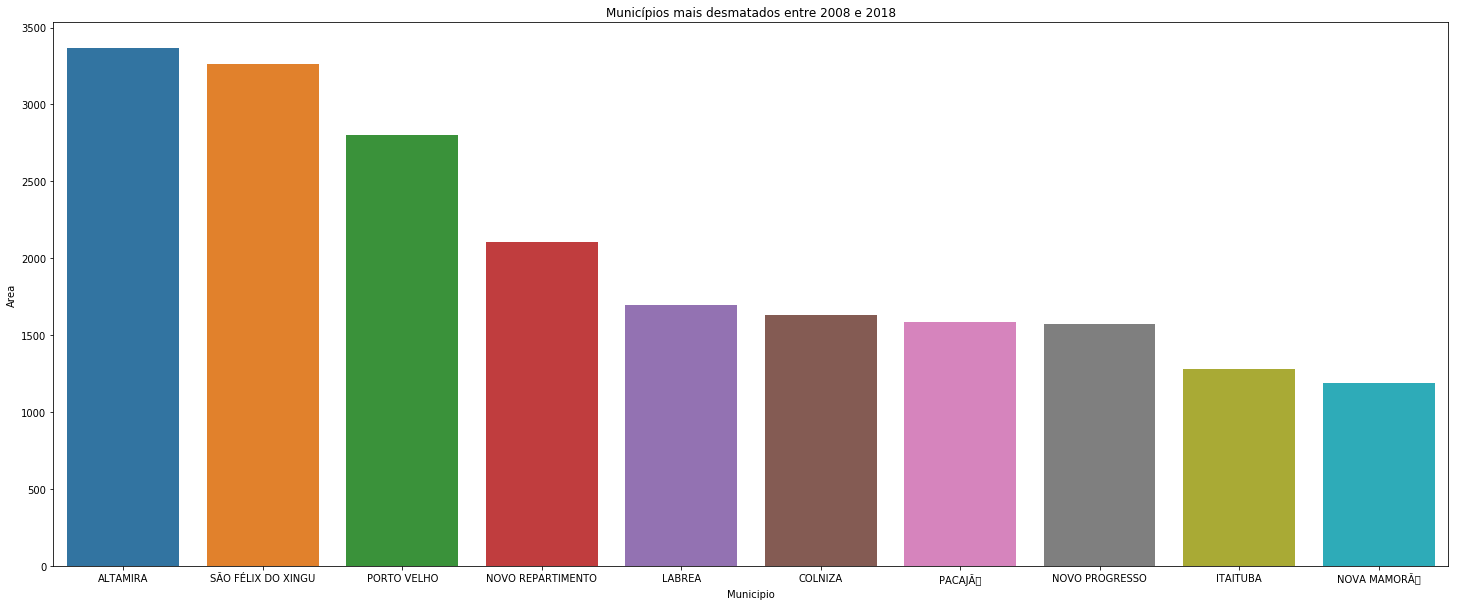

In [32]:
plt.figure(figsize=(25,10))
plt.title("Municípios mais desmatados entre 2008 e 2018")
sns.barplot(x="Municipio", y="Area", data=Top_Ten);

In [33]:
Altamira = df[df.Municipio == 'ALTAMIRA']
Altamira

,Ano,Area,Municipio
341,2018,433.359241,ALTAMIRA
791,2017,223.587612,ALTAMIRA
1241,2016,408.696760,ALTAMIRA
1661,2015,307.829824,ALTAMIRA
2113,2014,294.262987,ALTAMIRA
2550,2013,296.542895,ALTAMIRA
2981,2012,228.908231,ALTAMIRA
3436,2011,249.970171,ALTAMIRA
3909,2010,193.940225,ALTAMIRA
4378,2009,389.206938,ALTAMIRA


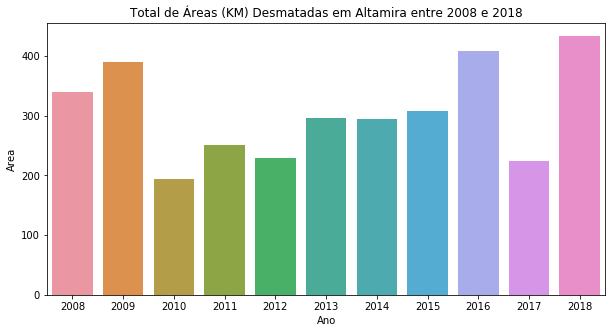

In [34]:
plt.figure(figsize=(10,5))
plt.title("Total de Áreas (KM) Desmatadas em Altamira entre 2008 e 2018")
sns.barplot(x="Ano", y="Area", data=Altamira);

In [35]:
SFX = df[df.Municipio == 'SÃO FÉLIX DO XINGU']
SFX

,Ano,Area,Municipio
242,2018,282.100349,SÃO FÉLIX DO XINGU
688,2017,236.685057,SÃO FÉLIX DO XINGU
1143,2016,314.625150,SÃO FÉLIX DO XINGU
1555,2015,199.337304,SÃO FÉLIX DO XINGU
2012,2014,152.482120,SÃO FÉLIX DO XINGU
2455,2013,220.771803,SÃO FÉLIX DO XINGU
2875,2012,167.598147,SÃO FÉLIX DO XINGU
3359,2011,139.289527,SÃO FÉLIX DO XINGU
3844,2010,349.323879,SÃO FÉLIX DO XINGU
4288,2009,439.573858,SÃO FÉLIX DO XINGU


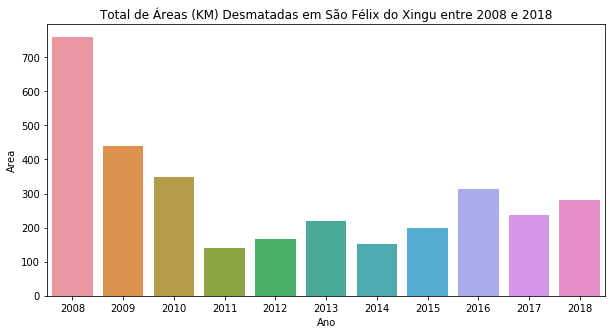

In [36]:
plt.figure(figsize=(10,5))
plt.title("Total de Áreas (KM) Desmatadas em São Félix do Xingu entre 2008 e 2018")
sns.barplot(x="Ano", y="Area", data=SFX);